In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter("ignore")
# Loading the dataset
data = pd.read_csv("odia.csv")
# value count for each language
data["label"].value_counts()
# separating the independent and dependant features
X = data["headings"]
y = data["label"]

In [3]:
data.head(10)

,headings,label
0,ଆଇସିସି ବିଶ୍ବକପରେ ସେ ଅଂଶ ଗ୍ରହଣ କରିଥିବାରୁ ସେ ନିଜ...,sports
1,ଅବସର ପାଇଁ ଚିନ୍ତା ନାହିଁ: ମାତ୍ର ୩୩% ଲୋକ କରୁଛନ୍ତ...,business
2,‘ପଦ୍ମାବତ୍‌’ ରିଲିଜ୍‌ ଉପରେ କଟକଣା ଜାରି କଲା ହରିଆଣା…,entertainment
3,ହାମିଲଟନ୍‌ ଟେଷ୍ଟରେ େଓ୍ଵଷ୍ଟଇଣ୍ଡିଜ୍‌ ୨୪୦ ରନ୍‌ରେ ...,sports
4,ଏହି ବଲିଉଡ୍‌ ଅଭିନେତ୍ରୀଙ୍କ ନାଁରେ ରଖାଗଲା ଗଣ୍ଡାର ...,entertainment
5,"ଗିଲ୍‌କ୍ରିଷ୍ଟ, ବାଉଚର ଓ ସାଙ୍ଗାକାରାଙ୍କ ପରେ ଚତୁର୍...",sports
6,କିଟ୍‌ରେ ଜାତୀୟ ଦଳଗତ ଚେସ୍‌ ଆରମ୍ଭ,sports
7,ଦକ୍ଷିଣ କୋରିଆକୁ ଶକ୍ତ ଧକ୍କା:ଜର୍ମାନି ମ୍ୟାଚ୍‌ରୁ ଅ...,sports
8,ମୀନା କୁମାରୀ ହେବେନି ବିଦ୍ୟା ବାଲନ୍‌,entertainment
9,ବୁମ୍‌ରା ମୋତେ ଭୁଲ୍ ପ୍ରମାଣିତ କରିଛନ୍ତି: କପିଳ ଦେବ,sports


In [4]:
data["label"].value_counts()

sports           8651
business         5779
entertainment    4572
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

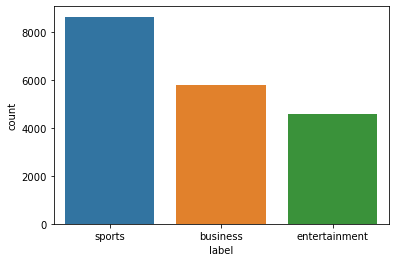

In [5]:
sns.countplot(data.label)

In [6]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [7]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    #text = text.lower()
    # appending to data_list
    data_list.append(text)

In [8]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(19002, 3978)

In [9]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
# model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
#from sklearn.naive_bayes import BernoulliNB
#model = BernoulliNB()
#model.fit(x_train, y_train)

In [12]:
# prediction 
y_pred = model.predict(x_test)

In [13]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('model Accuracy is:',ac)

model Accuracy is: 0.8316232570376216


In [14]:
# Confusion Matrix
cm

array([[ 906,   76,  144],
       [  78,  749,  107],
       [ 133,  102, 1506]], dtype=int64)

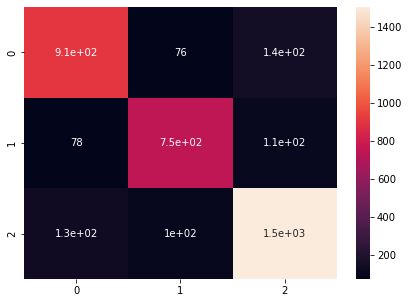

In [15]:
# visualising the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True)
plt.show()

In [16]:
 print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3801 points : 640


In [17]:
# function for predicting 
def head_pred(text):
    x = cv.transform([text]).toarray()
    head = model.predict(x)
    head = le.inverse_transform(head)
    print("The news headline",text,"is a",head[0],"News")

In [18]:
head_pred(' ଭାରତୀୟ ବଜାରରେ ଡୁଆଲ୍‌ କ୍ୟାମେରା')

The news headline  ଭାରତୀୟ ବଜାରରେ ଡୁଆଲ୍‌ କ୍ୟାମେରା is a business News


In [19]:
head_pred("ଚେସ୍‌ ଅଲିମ୍ପିଆଡ୍‌ରେ ଓଡ଼ିଶୀର ଝଲକ: ପ୍ରଧାନମନ୍ତ୍ରୀ ମୋଦୀ କଲେ ଉଦ୍‌ଘାଟନତ୍ରୀ")

The news headline ଚେସ୍‌ ଅଲିମ୍ପିଆଡ୍‌ରେ ଓଡ଼ିଶୀର ଝଲକ: ପ୍ରଧାନମନ୍ତ୍ରୀ ମୋଦୀ କଲେ ଉଦ୍‌ଘାଟନତ୍ରୀ is a sports News


In [20]:
head_pred("ଟି-ସାର୍ଟରେ ସୁଶାନ୍ତ ସିଂହଙ୍କ ଫଟୋ ଦେଖି ଫ୍ଲିପ୍‌କାର୍ଟ ଓ ଆମାଜନ୍ ଉପରେ ବର୍ଷିଲେ ପ୍ରଶଂସକ")

The news headline ଟି-ସାର୍ଟରେ ସୁଶାନ୍ତ ସିଂହଙ୍କ ଫଟୋ ଦେଖି ଫ୍ଲିପ୍‌କାର୍ଟ ଓ ଆମାଜନ୍ ଉପରେ ବର୍ଷିଲେ ପ୍ରଶଂସକ is a entertainment News


In [21]:
# function for predicting 
def news_pred(text):
    x = cv.transform([text]).toarray()
    head = model.predict(x)
    head = le.inverse_transform(head)
    print("The news is a",head[0],"News")

In [22]:
news_pred("ଆଉ ମାତ୍ର ଗୋଟିଏ ଦିନ ପରେ ଆରମ୍ଭ ହେବାକୁ ଥିବା ବର୍ମିଂହାମ ରାଜ୍ୟଗୋଷ୍ଠୀ କ୍ରୀଡ଼ା ପୂର୍ବରୁ ଭାରତକୁ ବଡ ଝଟ୍‌କା ଲାଗିିଛି। ଆହତ କାରଣରୁ ରାଜ୍ୟଗୋଷ୍ଠୀ କ୍ରୀଡ଼ାରୁ ବାଦ୍‌ ପଡିଛନ୍ତି ସୁନା ପୁଅ ନୀରଜ ଚୋପ୍ରା। ଅଲିମ୍ପିକ୍‌ସରେ ସ୍ବର୍ଣ୍ଣ ଓ ବିଶ୍ବ ଦୌଡ଼କୁଦ ଚମ୍ପିଆନସିପରେ ରୌପ୍ୟ ପଦକ ବିଜୟୀ ହୋଇଥିବା ଭାରତୀୟ ଦୌଡ଼କୁଦ ଜଗତର ମହାଯୋଦ୍ଧା")

The news is a sports News


In [23]:
news_pred("ତେବେ ଏଠି ପ୍ରଶ୍ନ ଉଠୁଛି ଅଭିନେତାଙ୍କ ସହିତ ଅଭିନେତ୍ରୀ ଜଣକ କେଉଁଠିକୁ ଯାଉଥିଲେ ? ଅଭିନେତା ଜଣକ ଡ୍ରାଇଭିଂ କରୁଥିବା ବେଳେ ଅଭିନେତ୍ରୀ ଜଣକ ଗାଡ଼ି ପଛରେ ନବସି ଆଗରେ ବସିଥିଲେ କାହିଁକି ? ପତ୍ନୀଙ୍କ ଅଭିଯୋଗ ଅନୁସାରେ ଅଭିନେତା ସ୍ବାମୀ କିଛି ଦିନ ହେବ ଘରକୁ ଯାଉନାହାନ୍ତି । ଯାହାର ସତ୍ୟାସତ୍ୟ ଜାଣିବାକୁ ଏପରି କରିଥିଲେ ଅଭିନେତାଙ୍କ ପତ୍ନୀ । ବାଟରେ ସ୍ୱାମୀଙ୍କ ସହ ଅଭିନେତ୍ରୀଙ୍କୁ ଦେଖି ନିଜକୁ ନିୟନ୍ତ୍ରଣରେ ରଖିପାରିନଥିଲେ । ଆଉ ରାସ୍ତାଉପରେ ଚାଲିଥିଲା ଷ୍ଟାର ଦମ୍ପତି ଓ ବାନ୍ଧବୀଙ୍କ ହାଇଡ୍ରାମା । ସୋସିଆଲ ମିଡିଆରେ ଭାଇରାଲ ହେଉଥିବା ଏହି ଭିଡିଓ ଭୁବନେଶ୍ୱରର ସତ୍ୟନଗର ଅଞ୍ଚଳରେ ହୋଇଥିବା ଜଣାପଡ଼ିଛି ।")

The news is a entertainment News


In [24]:
news_pred("ଭାରତୀୟ ଟେଲିକମ୍ ବଜାରରେ ବିଏସଏନଏଲର ଉପସ୍ଥିତି ଏକ ବଜାର ସନ୍ତୁଳନକାରୀ ଭାବେ କାର୍ଯ୍ୟ କରିଥାଏ । ଗ୍ରାମାଞ୍ଚଳରେ ଟେଲିକମ୍ ସେବାର ସମ୍ପ୍ରସାରଣ, ସ୍ବଦେଶୀ ଜ୍ଞାନକୌଶଳର ବିକାଶ ଏବଂ ବିପର୍ଯ୍ୟୟ ସହାୟତା କ୍ଷେତ୍ରରେ ବିଏସଏନଏଲର ଏକ ଗୁରୁତ୍ବପୂର୍ଣ୍ଣ ଭୂମିକା ରହିଛି ।")

The news is a business News


In [25]:
news_pred("ଜୀ ସାର୍ଥକରେ ଖୁବଶୀଘ୍ର ଆରମ୍ଭ ହେବାକୁ ଯାଉଛି ଓଡିଶାର ସବୁଠାରୁ ବଡ ସିଂଗିଙ୍ଗ ରିୟାଲିଟି ସୋ ‘ସା ରେ ଗା ମା ପା – ସ୍ୱରର ମହାମଞ୍ଚ’। ଯେଉଁ ସୋ’ରୁ ସଫଳତା ପାଇ ଆଜି ଓଡିଆ ସଂଗୀତ ଦୁନିଆରେ ଅନେକ ରାଜ୍ କରୁଛନ୍ତି, ସେହି ମେଗା ସୋ’ ପୁଣିଥରେ ଦର୍ଶକଙ୍କ ପାଖକୁ ଫେରୁଛି। ସ୍ୱର ଓ ସଂଗୀତକୁ ଭଲ ପାଉଥିବା ଏବଂ ଏଥିରେ କ୍ୟାରିୟର ଗଢ଼ିବାକୁ ଚାହୁଁଥିବା କଳାକାରମାନଙ୍କ ପାଇଁ ଏହି ସୋ ଏକ ବଡ ପ୍ଲାଟ୍ ଫର୍ମ।")

The news is a entertainment News


In [26]:
news_pred("ଶେଷ ହେଲା ୫ଜି ସ୍ପେକ୍ଟ୍ରମ୍ ନିଲାମ, ସରକାର ପାଇବେ ୧,୫୦,୧୭୩ କୋଟି")

The news is a business News
